# Load Data into Dataframes and modify

In [2]:
from formulas import *
import formulas as fl
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
# Read data in to dataframes
spy = pd.read_csv('SPY.csv')
dia = pd.read_csv('MSFT.csv')
qqq = pd.read_csv('TSLA.csv')


# Change date column to datetime type
spy['Date'] = pd.to_datetime(spy['Date'])
dia['Date'] = pd.to_datetime(dia['Date'])
qqq['Date'] = pd.to_datetime(qqq['Date'])



It is better to make predictions of returns versus stock price. This is because a 2% gain on a 100 dollar stock is not the same as a 2% gain on a 10 dollar stock. Stock returns are stationary in the fact that the magnitude is always in the same relative range. We will do a distribution plot further in the notebook.

In [4]:
# compute daily return
spy["day_return"] = spy["Close"].pct_change()
dia["day_return"] = dia["Close"].pct_change()

# compute daily log return
spy['log_day_return'] = np.log(spy['Close']) - np.log(spy['Close'].shift(1))
dia['log_day_return'] = np.log(dia['Close']) - np.log(dia['Close'].shift(1))

# Drop first row as the newly calculated columns will be N/A due to no previous data
spy = spy.iloc[1:]
dia = dia.iloc[1:]


### Arima Model

In [5]:
from statsmodels.tsa.arima.model import ARIMA

c:\Users\ronad\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


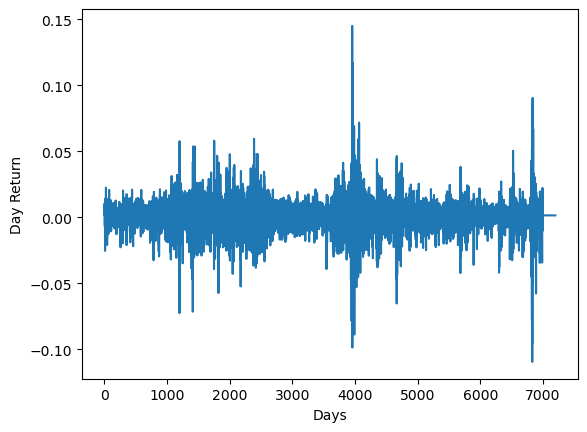

In [6]:
df = pd.DataFrame(spy.loc[:, 'day_return'])
dr = list(df['day_return'])


f=200


for i in range(1):
    model = ARIMA(dr, order=(5,1,1))
    model_fit = model.fit()

    forecast = model_fit.forecast(steps=f)
    dr+=list(forecast)


# plt.plot(spy['day_return'])
plt.plot(dr)
plt.xlabel("Days")
plt.ylabel("Day Return")
plt.show()



In [7]:
# f=2000
# # Fit the model
# for i in range(1):
#     model = ARIMA(df['day_return'], order=(5,1,0))
#     model_fit = model.fit()

#     forecast = model_fit.forecast(steps=f)
#     for j in list(forecast):
#         df.loc[len(df.index)+1] = {'day_return':j*2}


# plt.plot(df['day_return'])
# plt.plot(spy['day_return'])
# plt.show()

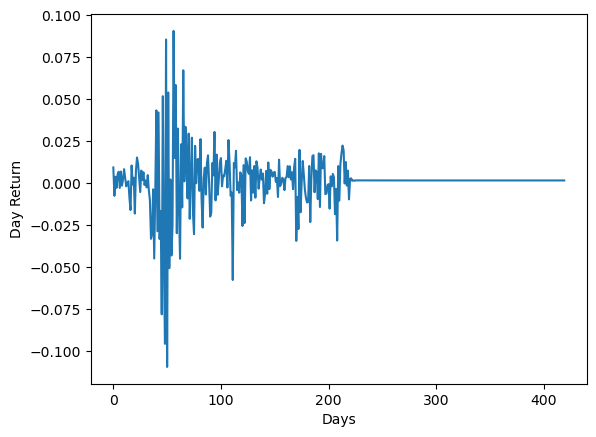

In [8]:
plt.plot(dr[6779:])

plt.xlabel("Days")
plt.ylabel("Day Return")
plt.show()

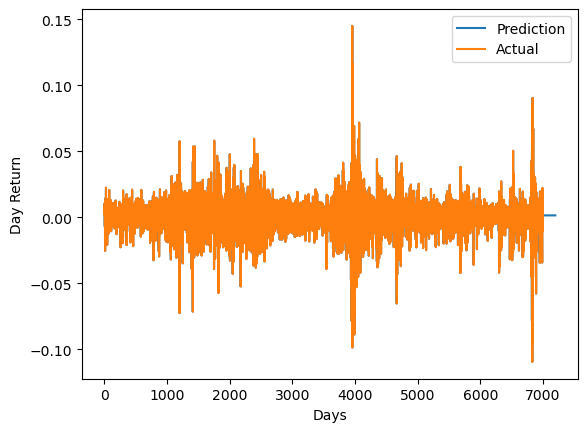

In [9]:
plt.plot(dr, label='Prediction')
plt.plot(spy['day_return'], label='Actual')

plt.xlabel("Days")
plt.ylabel("Day Return")
plt.legend()
plt.show()


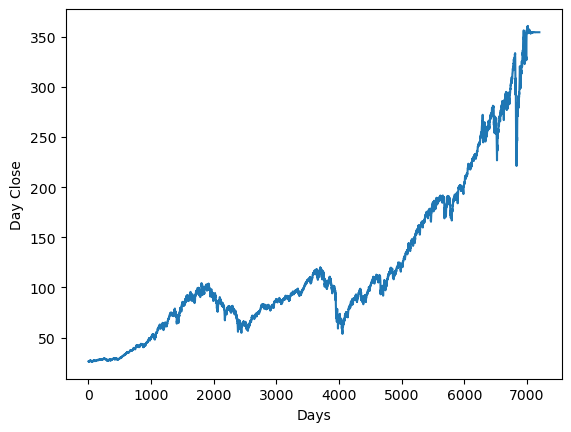

In [10]:
df = pd.DataFrame(spy.loc[:, 'Close'])
dr = list(df['Close'])


f=200


for i in range(1):
    model = ARIMA(dr, order=(60,1,1))
    model_fit = model.fit()

    forecast = model_fit.forecast(steps=f)
    dr+=list(forecast)


# plt.plot(spy['day_return'])
plt.plot(dr)

plt.xlabel("Days")
plt.ylabel("Day Close")
plt.show()

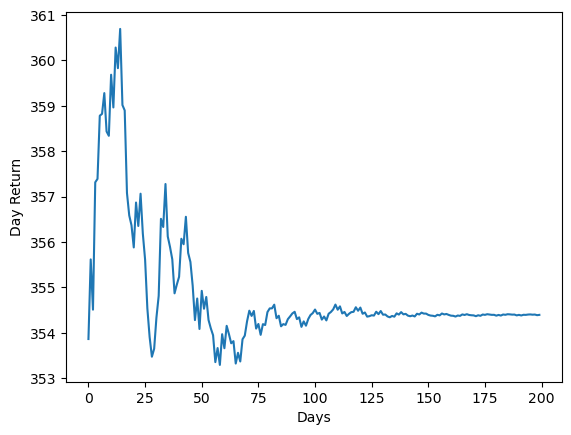

In [11]:
plt.plot(dr[-f:])

plt.xlabel("Days")
plt.ylabel("Day Return")
plt.show()

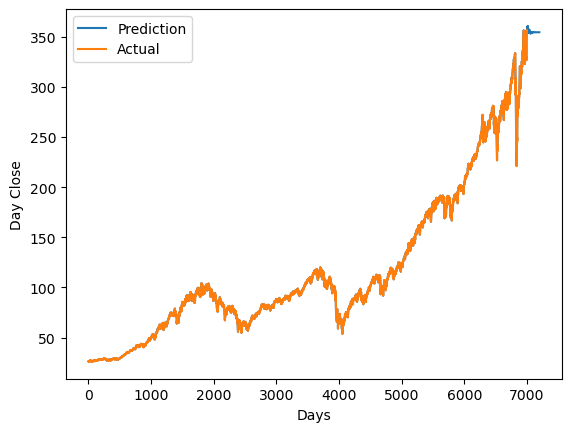

In [12]:
plt.plot(dr, label='Prediction')
plt.plot(spy['Close'], label='Actual')

plt.xlabel("Days")
plt.ylabel("Day Close")
plt.legend()
plt.show()


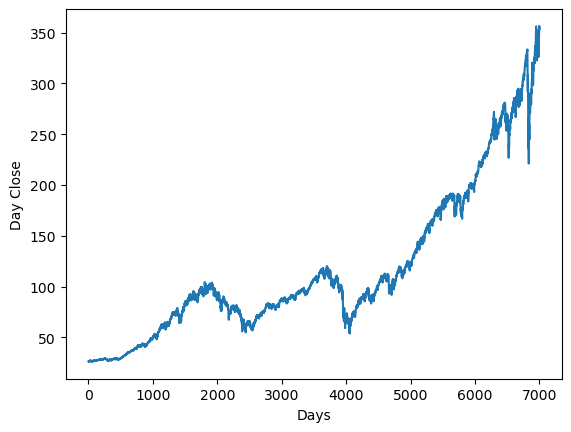

In [13]:
plt.plot(spy['Close'])

plt.xlabel("Days")
plt.ylabel("Day Close")
plt.show()


c:\Users\ronad\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


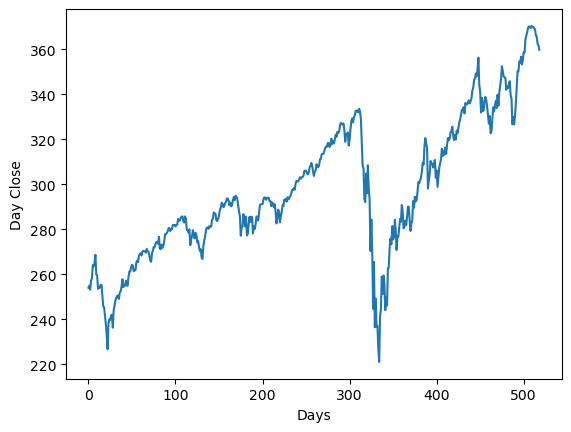

In [14]:
df = pd.DataFrame(spy.loc[:, 'Close'])
dr = list(df['Close'])
dr = dr[6500:]

f=20
r=1

for i in range(r):
    model = ARIMA(dr, order=(60,1,5))
    model_fit = model.fit()

    forecast = model_fit.forecast(steps=f)
    dr+=list(forecast)


# plt.plot(spy['day_return'])
plt.plot(dr)

plt.xlabel("Days")
plt.ylabel("Day Close")
plt.show()

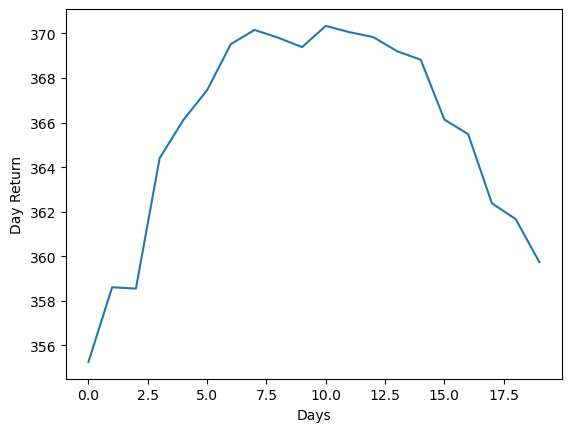

In [15]:
plt.plot(dr[-f*r:])
plt.xlabel("Days")
plt.ylabel("Day Return")
plt.show()

c:\Users\ronad\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


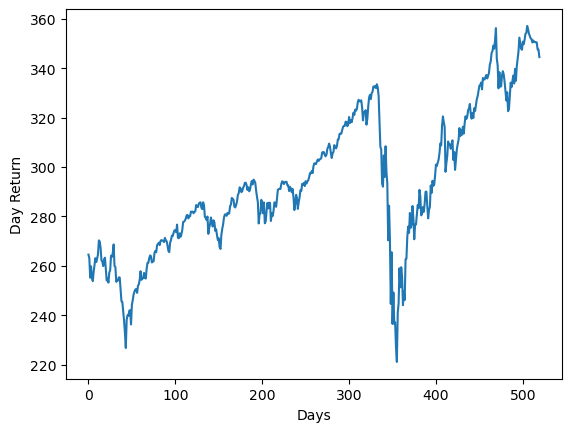

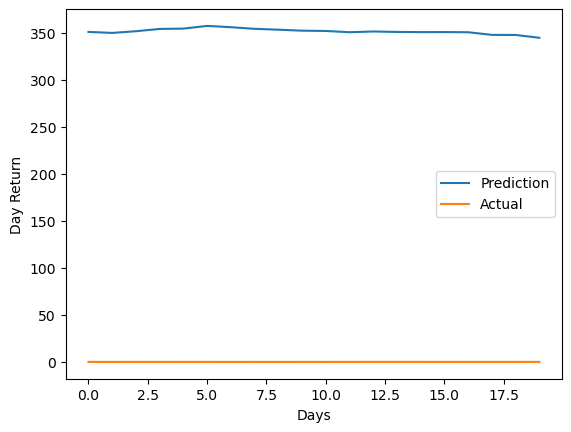

In [16]:
df = pd.DataFrame(spy.loc[:, 'Close'])
temp = list(df['Close'])
temp = temp[6479:6979]
dr=temp
# dr = [i-min(temp) for i in temp]

f=20
r=1

for i in range(r):
    model = ARIMA(dr, order=(60,1,5))
    model_fit = model.fit()

    forecast = model_fit.forecast(steps=f)
    dr+=list(forecast)


# plt.plot(spy['day_return'])
plt.plot(dr)

plt.xlabel("Days")
plt.ylabel("Day Return")
plt.show()

plt.plot(dr[-f*r:], label='Prediction')
plt.plot(list(spy['day_return'])[-f*r:], label='Actual')
plt.xlabel("Days")
plt.ylabel("Day Return")
plt.legend()
plt.show()

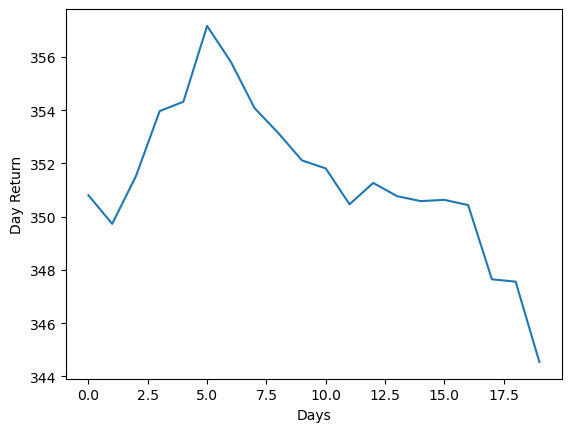

In [17]:
plt.plot(dr[-f*r:])
plt.xlabel("Days")
plt.ylabel("Day Return")
plt.show()

c:\Users\ronad\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\ronad\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\ronad\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


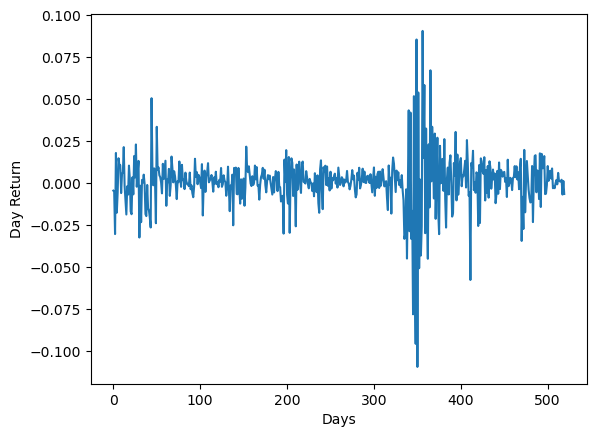

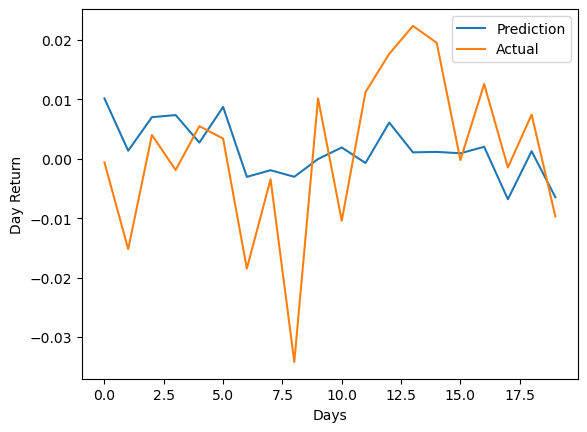

In [18]:
df = pd.DataFrame(spy.loc[:, 'day_return'])
temp = list(df['day_return'])
temp = temp[6479:6979]
dr=temp
# dr = [i-min(temp) for i in temp]

f=20
r=1

for i in range(r):
    model = ARIMA(dr, order=(60,1,5))
    model_fit = model.fit()

    forecast = model_fit.forecast(steps=f)
    dr+=list(forecast)


# plt.plot(spy['day_return'])
plt.plot(dr)

plt.xlabel("Days")
plt.ylabel("Day Return")
plt.show()

plt.plot(dr[-f*r:], label='Prediction')
plt.plot(list(spy['day_return'])[-f*r:], label='Actual')
plt.xlabel("Days")
plt.ylabel("Day Return")
plt.legend()
plt.show()

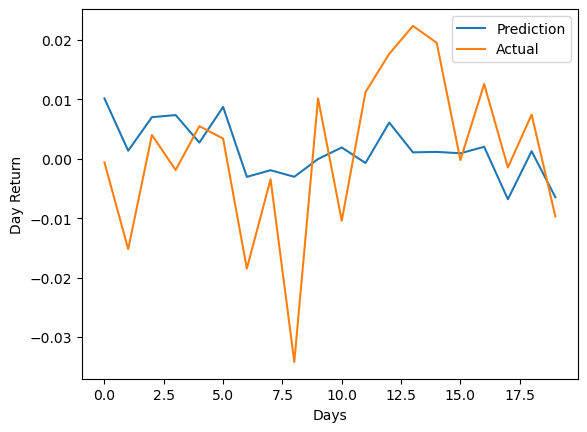

In [19]:
plt.plot(dr[-f*r:], label='Prediction')
plt.plot(list(spy['day_return'])[-f*r:], label='Actual')
plt.xlabel("Days")
plt.ylabel("Day Return")
plt.legend()
plt.show()

In [20]:
import yfinance as yf
btc = yf.Ticker("BTC-USD").history(period="max")
btc["day_return"] = btc['Close'].pct_change()

c:\Users\ronad\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\ronad\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\ronad\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


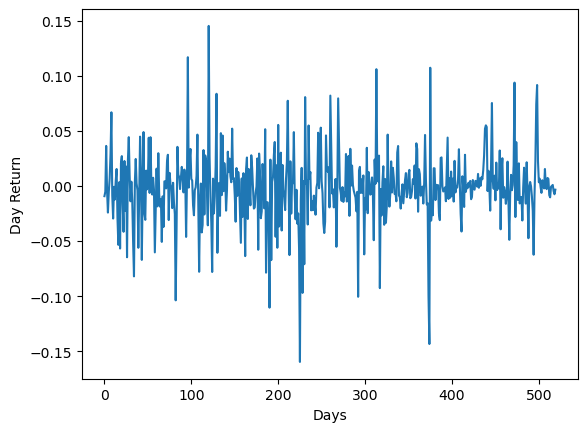

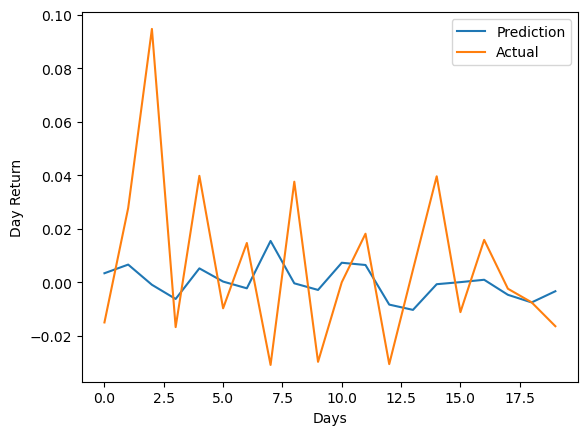

In [21]:
df = pd.DataFrame(btc.loc[:, 'day_return']).iloc[1:]
temp = list(df['day_return'])
l = len(temp)
temp = temp[l-520:l-20]
dr=temp
# dr = [i-min(temp) for i in temp]

f=20
r=1

for i in range(r):
    model = ARIMA(dr, order=(60,1,5))
    model_fit = model.fit()

    forecast = model_fit.forecast(steps=f)
    dr+=list(forecast)


plt.plot(dr)

plt.xlabel("Days")
plt.ylabel("Day Return")
plt.show()

plt.plot(dr[-f*r:], label='Prediction')
plt.plot(list(btc['day_return'])[-f*r:], label='Actual')
plt.xlabel("Days")
plt.ylabel("Day Return")
plt.legend()
plt.show()
